In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import hvplot.pandas
import requests
import seaborn as sns

In [10]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
arrest_data_df = pd.read_csv("Resources/BPD_Arrests.csv")

# Display sample data
arrest_data_df

,X,Y,arrestnumber,age,gender,race,arrestdatetime,arrestlocation,incidentoffence,incidentlocation,...,chargedescription,district,post,neighborhood,latitude,longitude,geolocation,incidentnumber,objectid,shape
0,1.401347e+06,608148.870493,23000037.0,39.0,M,B,2022/12/31 23:50:00+00,4000 OAKFORD ST,Unknown Offense,4000 OAKFORD ST,...,HGV,Northwest,621,West Arlington,39.3361,-76.6853,"(39.3361,-76.6853)",22L09338,1,NaN
1,1.401347e+06,608148.870493,23000039.0,50.0,M,B,2022/12/31 23:50:00+00,4000 OAKFORD ST,Unknown Offense,4000 OAKFORD ST,...,HGV,Northwest,621,West Arlington,39.3361,-76.6853,"(39.3361,-76.6853)",22L09338,2,NaN
2,NaN,NaN,23000010.0,27.0,M,B,2022/12/31 23:40:00+00,NaN,Unknown Offense,NaN,...,FAILURE TO APPEAR,NaN,NaN,NaN,NaN,NaN,"(,)",NaN,3,NaN
3,1.417636e+06,595206.835862,23000050.0,42.0,M,B,2022/12/31 23:15:00+00,500 DOLPHIN ST,Unknown Offense,500 DOLPHIN ST,...,HGV,Central,123,Upton,39.3004,-76.6279,"(39.3004,-76.6279)",22L09343,4,NaN
4,NaN,NaN,22157188.0,31.0,M,B,2022/12/31 21:00:00+00,NaN,Unknown Offense,NaN,...,FAILURE TO APPEAR,NaN,NaN,NaN,NaN,NaN,"(,)",NaN,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362415,1.408062e+06,605113.277780,10000035.0,68.0,M,B,2010/01/01 00:05:00+00,2900 NORFOLK AV,54ARMED PERSON,2900 NORFOLK AV,...,HGV,Northwest,612,Park Circle,39.3277,-76.6616,"(39.3277,-76.6616)",10A00005,362416,NaN
362416,1.436274e+06,603484.911890,10000077.0,20.0,M,B,2010/01/01 00:05:00+00,3500 SHANNON DR,87NARCOTICS,3500 SHANNON DR,...,CDS VIOLATION,Northeast,432,Lower Herring Run Park,39.3229,-76.5619,"(39.3229,-76.5619)",10A00011,362417,NaN
362417,1.401876e+06,594236.816091,10000013.0,28.0,M,B,2010/01/01 00:01:00+00,900 WILDWOOD PW,79OTHER,900 WILDWOOD PW,...,HANDGUN VIOLATION,Southwest,815,Edmondson Village,39.2979,-76.6836,"(39.2979,-76.6836)",10A00009,362418,NaN
362418,1.428992e+06,599772.172473,10000018.0,25.0,M,B,2010/01/01 00:01:00+00,1900 COLLINGTON AV,87NARCOTICS,1900 COLLINGTON AV,...,DISTRIBUTION HERION,Eastern,331,South Clifton Park,39.3128,-76.5877,"(39.3128,-76.5877)",10A00024,362419,NaN


In [12]:
# 
data_df= arrest_data_df[['arrestnumber','age', 'gender', 'race','arrestdatetime', 'incidentoffence','charge', 'chargedescription', 'district','neighborhood','latitude','longitude','geolocation','incidentnumber']].copy()


# Display sample data
data_df


,arrestnumber,age,gender,race,arrestdatetime,incidentoffence,charge,chargedescription,district,neighborhood,latitude,longitude,geolocation,incidentnumber
0,23000037.0,39.0,M,B,2022/12/31 23:50:00+00,Unknown Offense,1 0692,HGV,Northwest,West Arlington,39.3361,-76.6853,"(39.3361,-76.6853)",22L09338
1,23000039.0,50.0,M,B,2022/12/31 23:50:00+00,Unknown Offense,1 0692,HGV,Northwest,West Arlington,39.3361,-76.6853,"(39.3361,-76.6853)",22L09338
2,23000010.0,27.0,M,B,2022/12/31 23:40:00+00,Unknown Offense,1 0077,FAILURE TO APPEAR,NaN,NaN,NaN,NaN,"(,)",NaN
3,23000050.0,42.0,M,B,2022/12/31 23:15:00+00,Unknown Offense,1 0692,HGV,Central,Upton,39.3004,-76.6279,"(39.3004,-76.6279)",22L09343
4,22157188.0,31.0,M,B,2022/12/31 21:00:00+00,Unknown Offense,1 0077,FAILURE TO APPEAR,NaN,NaN,NaN,NaN,"(,)",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362415,10000035.0,68.0,M,B,2010/01/01 00:05:00+00,54ARMED PERSON,NaN,HGV,Northwest,Park Circle,39.3277,-76.6616,"(39.3277,-76.6616)",10A00005
362416,10000077.0,20.0,M,B,2010/01/01 00:05:00+00,87NARCOTICS,1 0573,CDS VIOLATION,Northeast,Lower Herring Run Park,39.3229,-76.5619,"(39.3229,-76.5619)",10A00011
362417,10000013.0,28.0,M,B,2010/01/01 00:01:00+00,79OTHER,2 5212,HANDGUN VIOLATION,Southwest,Edmondson Village,39.2979,-76.6836,"(39.2979,-76.6836)",10A00009
362418,10000018.0,25.0,M,B,2010/01/01 00:01:00+00,87NARCOTICS,2A0696,DISTRIBUTION HERION,Eastern,South Clifton Park,39.3128,-76.5877,"(39.3128,-76.5877)",10A00024


In [24]:
# Get a summary of the dataset's statistics
data_df.describe()

,arrestnumber,age,latitude,longitude,year
count,3.455030e+05,362283.000000,223880.000000,223880.000000,362420.000000
mean,1.470650e+07,33.199816,37.856009,-73.797659,2014.480528
std,3.466462e+06,11.612476,7.403361,14.432298,3.520714
min,1.000001e+07,8.000000,0.000000,-76.711300,2010.000000
25%,1.240206e+07,24.000000,39.288500,-76.647400,2012.000000
50%,1.404946e+07,30.000000,39.300400,-76.616600,2014.000000
75%,1.712066e+07,42.000000,39.316600,-76.586300,2017.000000
max,9.990540e+07,100.000000,39.372000,0.000000,2023.000000


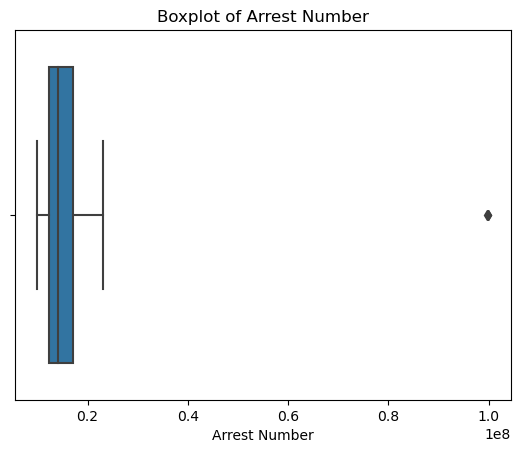

In [29]:
# Calculate quartiles
Q1 = data_df['arrestnumber'].quantile(0.25)
Q3 = data_df['arrestnumber'].quantile(0.75)
IQR = Q3 - Q1

# Detect outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data_df[(data_df['arrestnumber'] < lower_bound) | (data_df['arrestnumber'] > upper_bound)]

# Create a boxplot
sns.boxplot(x=data_df['arrestnumber'])
plt.xlabel('Arrest Number')
plt.title('Boxplot of Arrest Number')
plt.show()

In [41]:
# Calculate quartiles and IQR
Q1 = data_df['arrestnumber'].quantile(0.25)
Q3 = data_df['arrestnumber'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset by removing outliers
data_filtered = data_df[(data_df['arrestnumber'] >= lower_bound) & (data_df['arrestnumber'] <= upper_bound)]

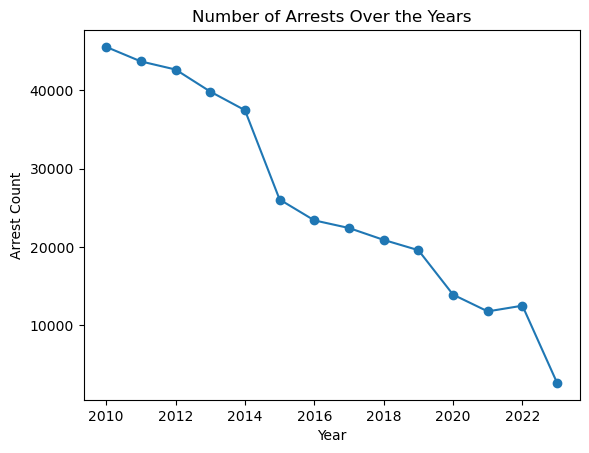

In [45]:
# Convert the 'arrestdatetime' column to datetime data type
data_df['arrestdatetime'] = pd.to_datetime(data_df['arrestdatetime'])

# Extract the year from the 'arrestdatetime' column
data_df['year'] = data_df['arrestdatetime'].dt.year

# Group the data by year and calculate the count of arrests
arrests_by_year = data_df['year'].value_counts().sort_index()

# Create a line chart to visualize the number of arrests over the years
plt.plot(arrests_by_year.index, arrests_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Arrest Count')
plt.title('Number of Arrests Over the Years')
plt.show()

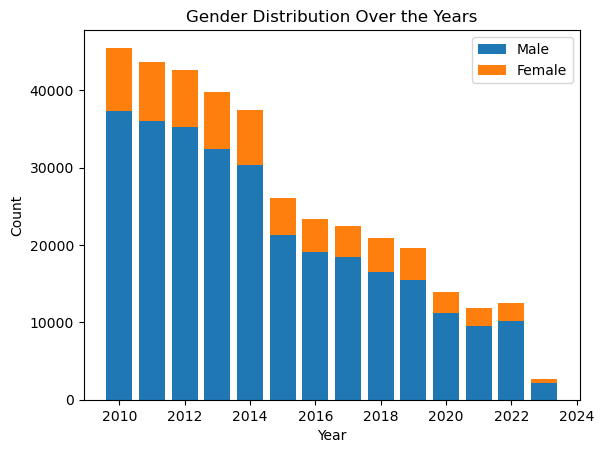

In [52]:
# Group the data by year and gender and calculate the counts
gender_counts = data_df.groupby(['year', 'gender']).size().unstack()

# Create a stacked bar chart for each gender
plt.bar(gender_counts.index, gender_counts['M'], label='Male')
plt.bar(gender_counts.index, gender_counts['F'], bottom=gender_counts['M'], label='Female')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Gender Distribution Over the Years')
plt.legend()

plt.show()

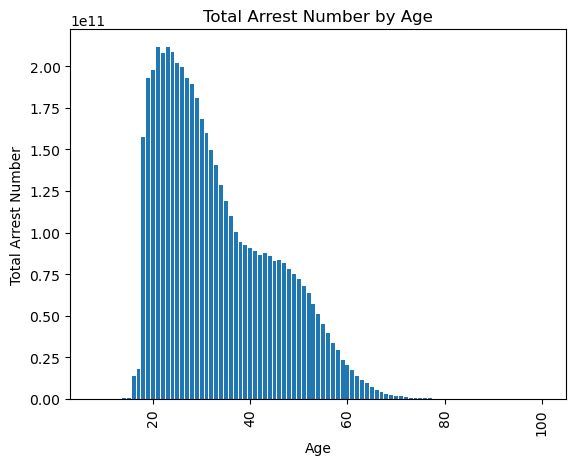

In [43]:
# Import the necessary libraries
import matplotlib.pyplot as plt

# Group the data by age and calculate the total arrest number for each age group
age_groups = data_filtered.groupby('age')['arrestnumber'].sum()

# Create a bar chart of age and total arrest number
plt.bar(age_groups.index, age_groups.values)
plt.xlabel('Age')
plt.ylabel('Total Arrest Number')
plt.title('Total Arrest Number by Age')
plt.xticks(rotation=90)
plt.show()

In [37]:
# Group the data by race and calculate the average age within each group
avg_age_by_race = data_df.groupby('race')['age'].mean()
print(avg_age_by_race)

race
A    33.830385
B    32.940058
H    50.000000
I    32.885584
U    31.871392
W    34.842350
Name: age, dtype: float64


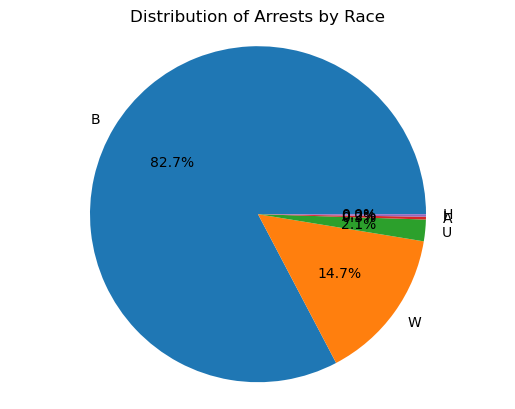

In [45]:
# Create a pie chart of the distribution of arrests by race
arrests_by_race = data_df['race'].value_counts()
plt.pie(arrests_by_race.values, labels=arrests_by_race.index, autopct='%1.1f%%')
plt.title('Distribution of Arrests by Race')
plt.axis('equal')
plt.show()

In [59]:
# Check the data types of each column
data_df.dtypes


arrestnumber         float64
age                  float64
gender                object
race                  object
arrestdatetime        object
incidentoffence       object
charge                object
chargedescription     object
district              object
neighborhood          object
latitude             float64
longitude            float64
geolocation           object
incidentnumber        object
dtype: object